# Visualization with Python



<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="http://yogen.io/assets/logo.svg" alt="yogen" style="width: 200px; float: right;"/>

# `matplotlib`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# esto hace que las figuras salgan aqui en el notebook

## Matplotlib basic plotting

A MATLAB-like plotting framework: [`pyplot`](https://matplotlib.org/api/pyplot_api.html). 

Also known as the "state-machine environment" because we can call methods of a global state machine and they will affect the appropiate objects.

### Lines

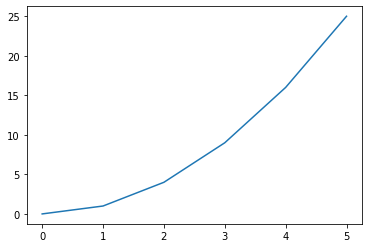

In [3]:
plt.plot([0,1,2,3,4,5],[0,1,4,9,16,25])

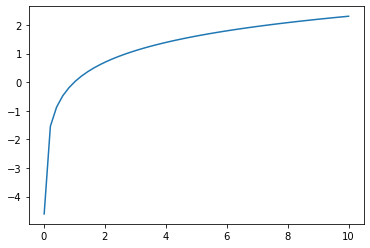

In [6]:
xs = np.linspace(.01, 10)
ys = np.log(xs)

plt.plot(xs, ys)

#### Exercise

Plot the logistic function 


$$f(x) = \frac{e^x}{1 + e^x}$$

Between -7 and 7


In [ ]:
# la función logística convierte números de menos infinito a más infinito en números entre  y 1 (útil para probabilidades)

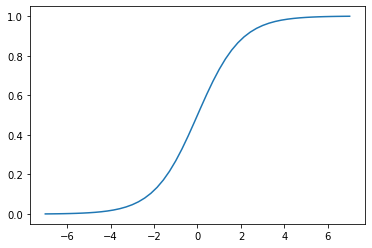

In [7]:
x = np.linspace(-7, 7)
y = (np.exp(x)/(1 + np.exp(x)))

plt.plot(x, y)

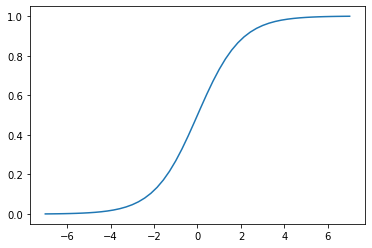

In [14]:
def logistica(expresion):
    return np.exp(x)/(1 + np.exp(x))

x = np.linspace(-7, 7)
plt.plot(x, logistica(x))

### Scatter plots

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


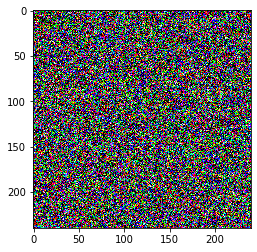

In [20]:
xs = np.random.randn(240,240,3)
plt.imshow(xs)

# es una imagen aleatoria
# los negativos se interpretan como cero, por eso sale mucho negro

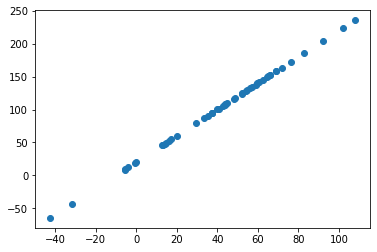

In [22]:
xs = np.random.randn(50) * 30 + 50
# así los movemos a la derecha
ys = 2 * xs + 20
plt.scatter(xs, ys)

Here we are using a random noise ("jitter"
) added over the (perfectly following $f(x) = 2x + 20$) Y2 Series in order to get some noisier, more real-looking generated data.


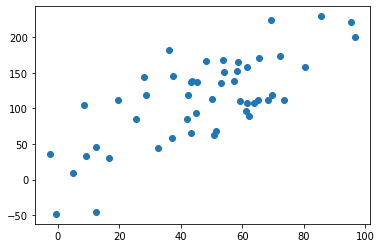

In [23]:
xs = np.random.randn(50) * 30 + 50
ys = 2 * xs + 20 + np.random.randn(50) * 30
# así añadimos ruido (jitter)

plt.scatter(xs, ys)

This is what happens if you make a line plot of unsorted data:

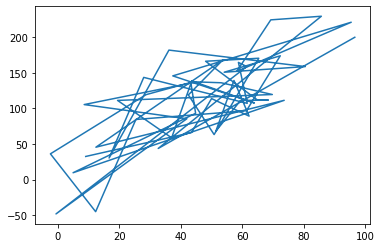

In [24]:
plt.plot(xs, ys)
# va uniendo los puntos según van apareciendo, habría que ordenarlos primero

### Bar plots

Do not confuse with histograms

<BarContainer object of 3 artists>

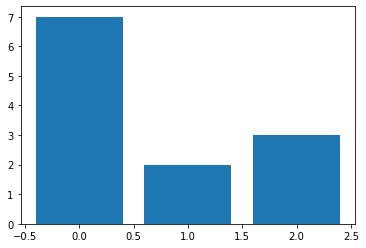

In [26]:
plt.bar(range(3), [7,2,3])
# en el bar plot las barras no se tocan. la x es una variable discreta. 
# En un histograma es una variable continua que se ha discretizado en categorias

([<matplotlib.axis.XTick at 0x7fc046df0890>,
 <a list of 3 Text xticklabel objects>)

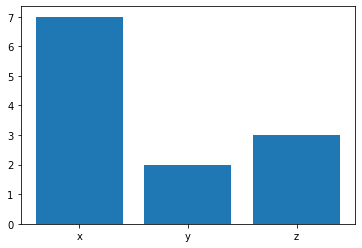

In [28]:
plt.bar(range(3), [7,2,3])
plt.xticks(range(3),['x','y','z'])
# sustituimos las etiquetas del eje x

## The object-oriented interface

Essential for finer control.

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

We need to know the somewhat confusing [matplotlib terminology](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

![Anatomy of a Matplotlib Figure](http://matplotlib.org/_images/anatomy1.png)

In [ ]:
# axes representa un panel

#### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.

#### Axes vs Axis

An `Axes` (yes, it looks like a plural noun but it's not, necessarily) is a single panel of a figure. An `Axes` contains generally 2, but sometimes 3, `Axis`. It is the object type we'll spend most time interacting with.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.

#### Artists

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure).

https://matplotlib.org/users/artists.html

### Interlude: the recommended interface for our plotting functions

From [the matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html):

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
```

## `add_axes()`, `add_subplot`, and `subplots()` 

We can add Axes to a Figure by calling its add_axes method.

A subplot is just an Axes that we place within an imaginary grid.

For even finer control we can use [GridSpec](http://matplotlib.org/api/gridspec_api.html)

### `add_axes()`

See https://matplotlib.org/users/artists.html

Total flexibility in placing the Axes: we specify `[left, bottom, width, height]` in 0-1 relative figure coordinates.

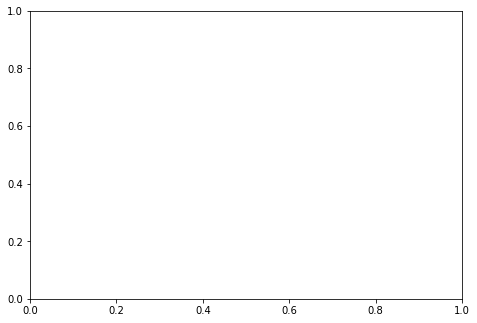

In [32]:
f = plt.figure(figsize=(6,4))
f.add_axes([0,0,1,1])
# el tamaño es en pulgadas por defecto
# añade un eje y tenemos que especificar la posición y el tamaño expresado como fracciones de figura de anchura y altura,
# número de entre 0 y 1
# esto es un panel, que ocupa toda la figura

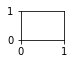

In [33]:
f = plt.figure(figsize=(6,4))
f.add_axes([0,0,.1,.1])
# lo que no ocupa la figura se recorta

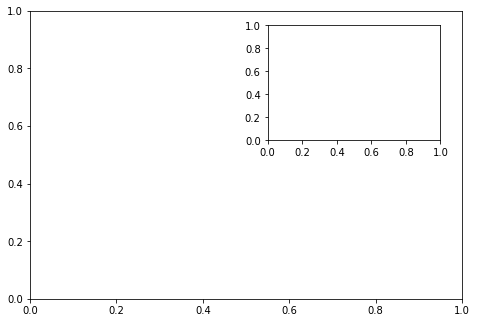

In [36]:
f = plt.figure(figsize=(6,4))
f.add_axes([0,0,1,1])
f.add_axes([0.55,0.55,.4,.4])



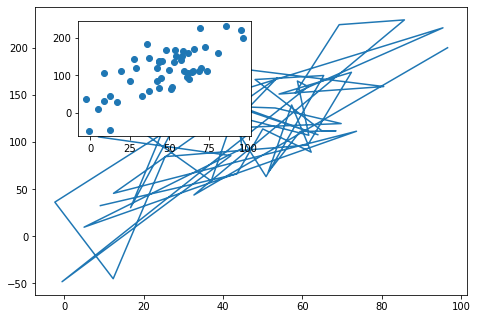

In [38]:
f = plt.figure(figsize=(6,4))
axes1 = f.add_axes([0,0,1,1])
axes2 = f.add_axes([0.10,0.55,.4,.4])

axes1.plot(xs,ys)
axes2.scatter(xs,ys)

(50, 150)

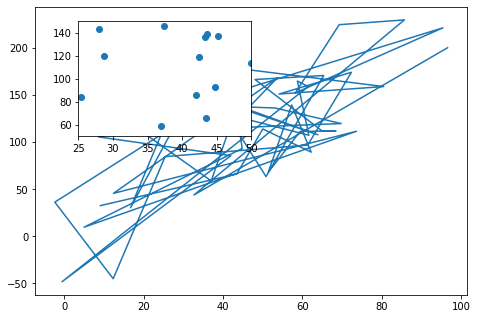

In [39]:
f = plt.figure(figsize=(6,4))
axes1 = f.add_axes([0,0,1,1])
axes2 = f.add_axes([0.10,0.55,.4,.4])

axes1.plot(xs,ys)
axes2.scatter(xs,ys)
axes2.set_xlim(25,50)
axes2.set_ylim(50,150)

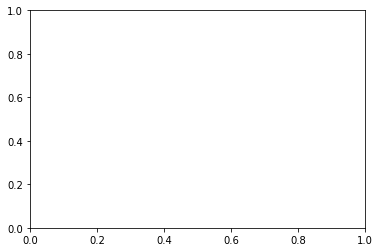

In [40]:
plt.gcf()
# get current figure
plt.gca()
# get current axes

### Subplots

We can add them with either `figure.add_subplot()` or create a figure with its subplots directly by calling `plt.subplots()`

In [ ]:
# paneles que ocupan espacio en una rejilla

(50, 150)

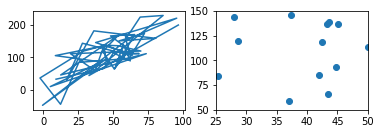

In [41]:
f = plt.figure(figsize=(6,4))
axes1 = f.add_subplot(2,2,1)
# hay que pasarle altura anchura y posición
# el ultimo numero indica izquierda
axes2 = f.add_subplot(2,2,2)

axes1.plot(xs,ys)
axes2.scatter(xs,ys)
axes2.set_xlim(25,50)
axes2.set_ylim(50,150)

# nos permite especificar facilmente donde poner los plots y el tamaño
# las rejillas no tienen por que ser consistentes entre los distintos subplots

(50, 150)

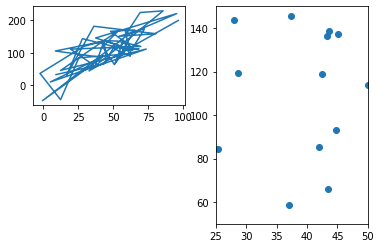

In [42]:
f = plt.figure(figsize=(6,4))
axes1 = f.add_subplot(2,2,1)
axes2 = f.add_subplot(1,2,2)

axes1.plot(xs,ys)
axes2.scatter(xs,ys)
axes2.set_xlim(25,50)
axes2.set_ylim(50,150)

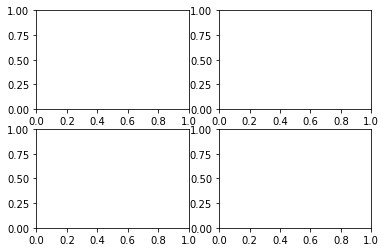

In [44]:
f, ax = plt.subplots(2,2)
# asi lo desempaquetamos

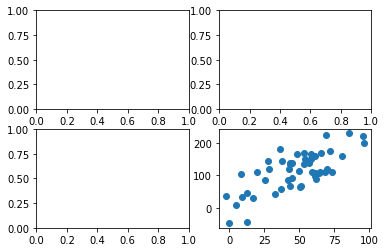

In [47]:
f, ax = plt.subplots(2,2)
ax[1,1].scatter(xs,ys)

/home/elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


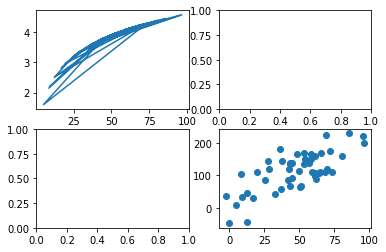

In [49]:
f, ax = plt.subplots(2,2)
ax[1,1].scatter(xs,ys)
ax[0,0].plot(xs, np.log(xs))

### `plt.subplots()`

### Sharing axis

/home/elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


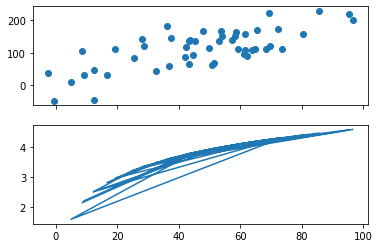

In [51]:
f, ax = plt.subplots(2,1, sharex=True)
# dos filas una columna
ax[0].scatter(xs,ys)
ax[1].plot(xs, np.log(xs))

# comparten el eje x

In [52]:
plt.style.use('ggplot')
# los siguients van a tener este estilo

/home/elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


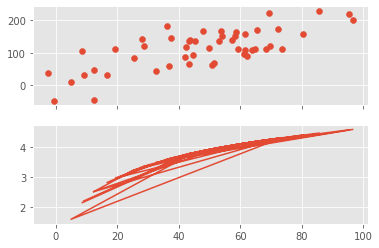

In [53]:
f, ax = plt.subplots(2,1, sharex=True)

ax[0].scatter(xs,ys)
ax[1].plot(xs, np.log(xs))

## `fill_between`

We can fill areas of the plot with solid color

The syntax is 

```python
plt.fill_between(X, Y1, Y2)
```

Where Y1 and Y2 are either `np.array`s or scalar values.

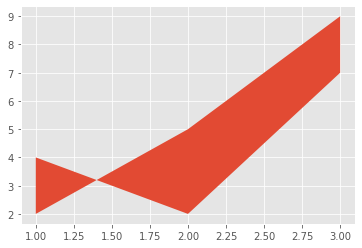

In [54]:
plt.fill_between([1,2,3],[4,2,7],[2,5,9])

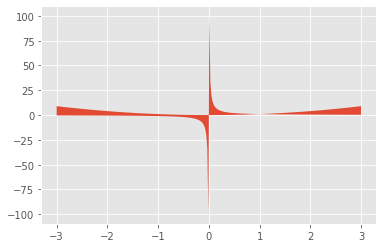

In [58]:
xs = np.linspace(-3,3, 300)

plt.fill_between(xs, xs ** 2, 1 / xs)

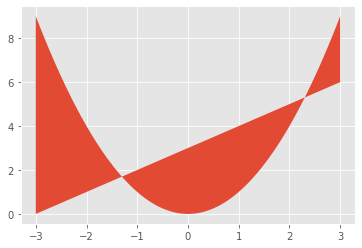

In [59]:
plt.fill_between(xs, xs ** 2, xs + 3)

## `fill_between`(`where=`)

We can fill areas of the plot with solid color differently in different parts of the graph.

The syntax is 

```python
plt.fill_between(X, Y1, Y2, where=boolean_array)
```

Where Y1 and Y2 are either `np.array`s or scalar values, and boolean_array can be constructed from X, from Y, or from whatever you want.

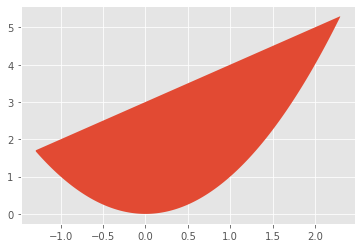

In [61]:
plt.fill_between(xs, xs ** 2, xs + 3, (xs + 3) > xs ** 2)

#### Exercise:
Given this code:
```python
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()
```

Reproduce this plot:

![Exercise](figs/plot_ex.png)



In [ ]:
plt.fill_between(xs, xs ** 2, xs + 3, (xs + 3) > xs ** 2)

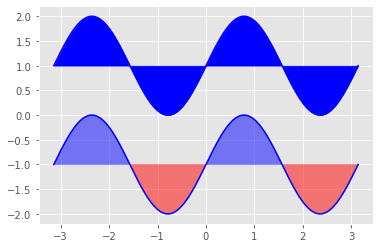

In [109]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.fill_between(X, Y + 1, 1, color='blue', alpha=1.00)
plt.fill_between(X, Y - 1, -1, color='blue', alpha=0.50, where=Y-1 > -1)
plt.fill_between(X, Y - 1, -1, color='red', alpha=0.50, where=Y-1 < -1)

plt.show()
# alpha es la opacidad

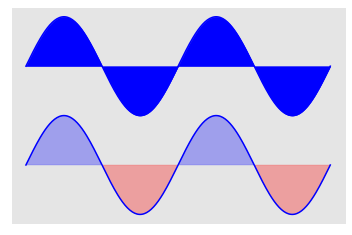

In [111]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)

plt.fill_between(X, Y + 1, 1, color='blue', alpha=1.00)
plt.fill_between(X, Y - 1, -1, color='blue', alpha=0.30, where=Y-1 > -1)
plt.fill_between(X, Y - 1, -1, color='red', alpha=0.30, where=Y-1 < -1)
plt.xticks([])
plt.yticks([])
plt.savefig('sine_exercise.png')

## Line properties


### Color

See https://matplotlib.org/users/colormaps.html

![Colormaps](https://matplotlib.org/_images/grayscale_01_00.png)

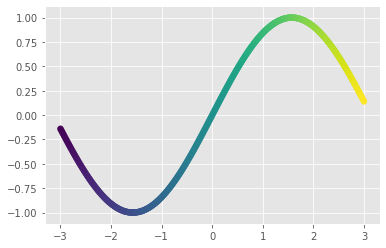

In [113]:
from matplotlib import cm

cmap = cm.get_cmap('Oranges')
plt.scatter(xs, np.sin(xs), c=xs)

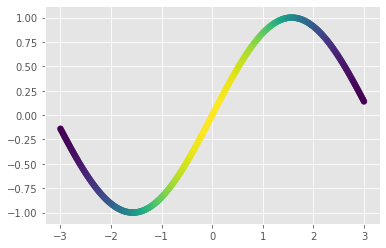

In [114]:
cmap = cm.get_cmap('Oranges')
plt.scatter(xs, np.sin(xs), c=np.cos(xs))

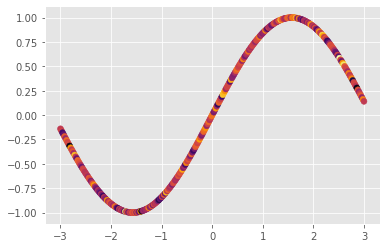

In [116]:
cmap = cm.get_cmap('inferno')
plt.scatter(xs, np.sin(xs), c=np.random.randn(len(xs)), cmap=cmap)

#### Exercise

Given this code, try to reproduce this graphic taking care of marker size, color and transparency.

```python
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()
```

![Color exercise](figs/scatter_ex.png)

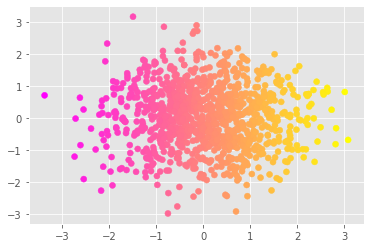

In [119]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
cmap = cm.get_cmap('spring')
plt.scatter(X,Y, c=X, cmap=cmap)
plt.show()

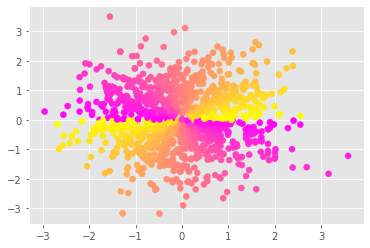

In [120]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
cmap = cm.get_cmap('spring')
plt.scatter(X,Y, c=np.arctan(X/Y), cmap=cmap)
plt.show()

### Markers and linestyles

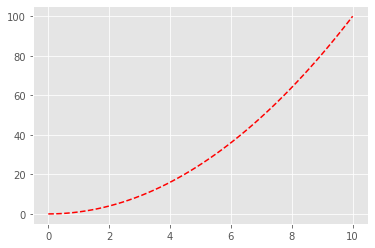

In [121]:
xs = np.linspace(0,10)
ys = xs ** 2

plt.plot(xs, ys, 'r--')

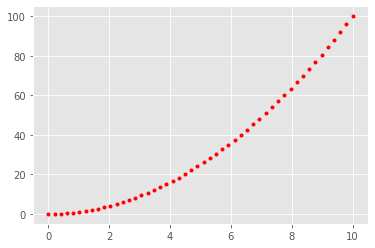

In [123]:
xs = np.linspace(0,10)
ys = xs ** 2

plt.plot(xs, ys, 'r.')

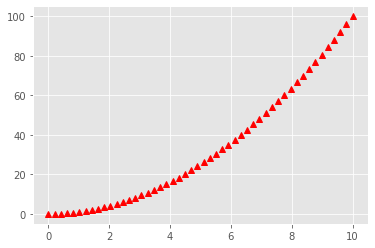

In [124]:
xs = np.linspace(0,10)
ys = xs ** 2

plt.plot(xs, ys, 'r^')

## Other attributes

http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb

### Histograms

(array([ 1.,  5.,  3.,  8., 14., 19., 39., 37., 47., 66., 70., 80., 99.,
        86., 91., 67., 65., 60., 48., 33., 34., 20., 15.,  6.,  6.,  3.,
         0.,  0.,  1.,  1.]),
 array([-2.96307408, -2.74480393, -2.52653378, -2.30826363, -2.08999347,
        -1.87172332, -1.65345317, -1.43518302, -1.21691287, -0.99864272,
        -0.78037257, -0.56210241, -0.34383226, -0.12556211,  0.09270804,
         0.31097819,  0.52924834,  0.7475185 ,  0.96578865,  1.1840588 ,
         1.40232895,  1.6205991 ,  1.83886925,  2.05713941,  2.27540956,
         2.49367971,  2.71194986,  2.93022001,  3.14849016,  3.36676032,
         3.58503047]),
 <a list of 30 Patch objects>)

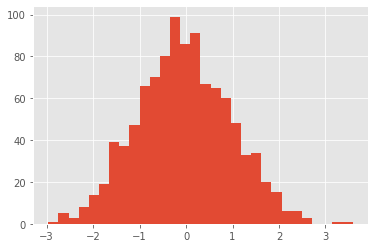

In [126]:
plt.hist(X, bins=30)

## Text and Math: $\LaTeX$

$\LaTeX$ is "a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents" ([$LaTeX$ project website](https://www.latex-project.org/)).

It's widely used for writing mathematical equations that need to be rendered accurately.

We can use it in pretty much any place we need to use text.




Text(0.5, 0, 'Distribution of quotient $QI=\\frac{test}{average}$')

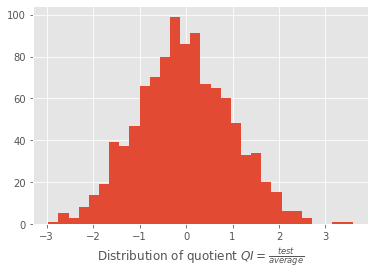

In [129]:
plt.hist(X, bins=30, label='IQ')
plt.xlabel(r'Distribution of quotient $QI=\frac{test}{average}$')

## Legends

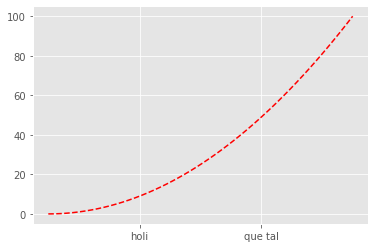

In [141]:
xs = np.linspace(0,10)
ys = xs ** 2

plt.plot(xs, ys, 'r--')
ax = plt.gca()
# get current axes, sirve para pasar de una interfaz a otra
ax.set_xticks([3,7]);
ax.set_xticklabels(['holi','que tal']);

(20, 60)

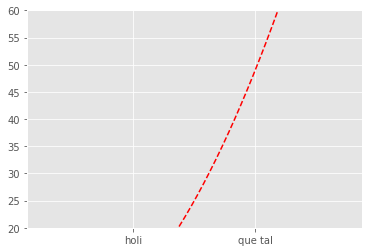

In [142]:
xs = np.linspace(0,10)
ys = xs ** 2

plt.plot(xs, ys, 'r--')
ax = plt.gca()
# get current axes, sirve para pasar de una interfaz a otra
ax.set_xticks([3,7]);
ax.set_xticklabels(['holi','que tal']);
ax.set_ylim(20,60)

## Ticks, tick labels, limits

### Ticks

### Tick labels

### Limits

# Seaborn

Seaborn is a statistical data visualization library. It's built on top of matplotlib and tries to "make a well-defined set of hard things easy" ([introduction to Seaborn](http://seaborn.pydata.org/introduction.html)).

One advantage over matplotlib is that it works natively with DataFrame objects.


https://www.datacamp.com/community/tutorials/seaborn-python-tutorial



#### Exercise:

Load the `houses.csv` file into memory as a pandas `DataFrame`. Inspect its head. Clean the column names.

In [144]:
df = pd.read_csv('houses.csv', index_col = 0)
short_column_names = ['local_prices', 'bathrooms', 'site_area', 
                      'living_area', 'garages', 'rooms', 
                      'bedrooms', 'age', 'construction_type', 
                      'architecture', 'fireplaces', 'price']

df.columns = short_column_names
df

,local_prices,bathrooms,site_area,living_area,garages,rooms,bedrooms,age,construction_type,architecture,fireplaces,price
index,,,,,,,,,,,,
1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,3,1,0,25.9
2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,1,1,0,29.5
3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,2,1,0,27.9
4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,4,1,0,25.9
5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,3,1,0,29.9
6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,2,1,0,29.9
7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,2,1,1,30.9
8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,1,1,0,28.9
9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,2,1,1,84.9


## Seaborn vs matplotlib



## Distribution plots

https://seaborn.pydata.org/tutorial/distributions.html

### Scatter plots

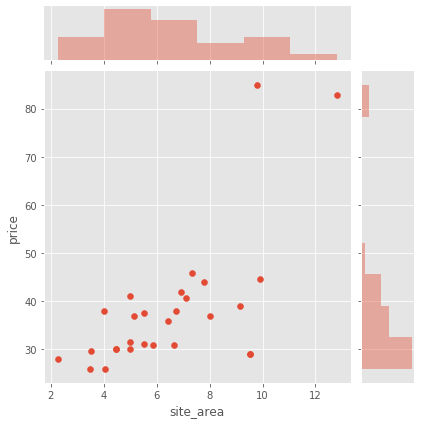

In [145]:
import seaborn as sns

sns.jointplot(df['site_area'], df['price'])
# histogramas de las variables, cada una por su cuenta

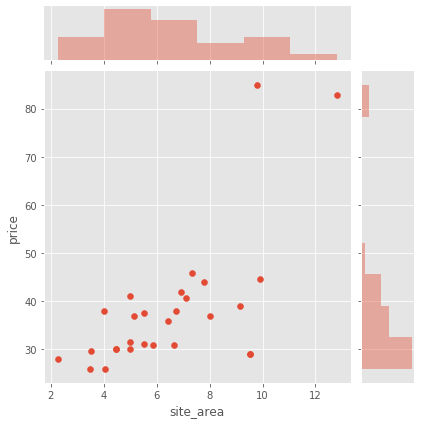

In [146]:
sns.jointplot(data=df, x='site_area', y='price')

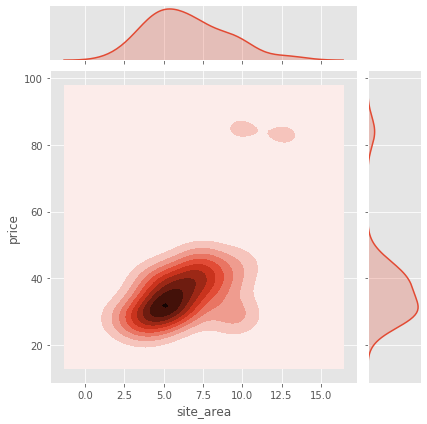

In [147]:
sns.jointplot(data=df, x='site_area', y='price', kind='kde')
# inferimos una distribucion a partir de unos datos

### Histogram

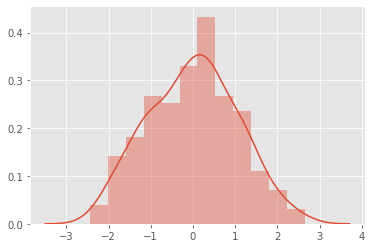

In [149]:
sns.distplot(np.random.randn(300))

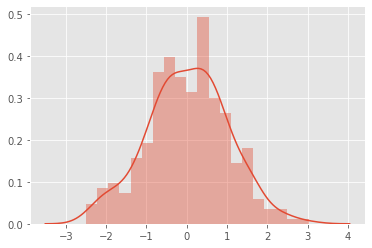

In [150]:
sns.distplot(np.random.randn(300), bins=20)

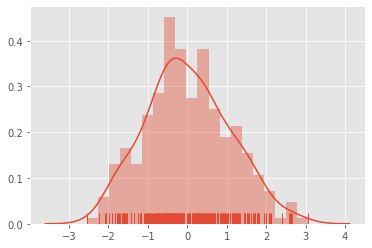

In [151]:
sns.distplot(np.random.randn(300), bins=20, rug=True)
# nos marca las observaciones individuales abajo

More on [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

### Pairwise relationships

In [154]:
smaller = df[['local_prices','site_area','living_area','rooms','age']]
smaller.head()

,local_prices,site_area,living_area,rooms,age
index,,,,,
1,4.9176,3.472,0.998,7,42
2,5.0208,3.531,1.500,7,62
3,4.5429,2.275,1.175,6,40
4,4.5573,4.050,1.232,6,54
5,5.0597,4.455,1.121,6,42


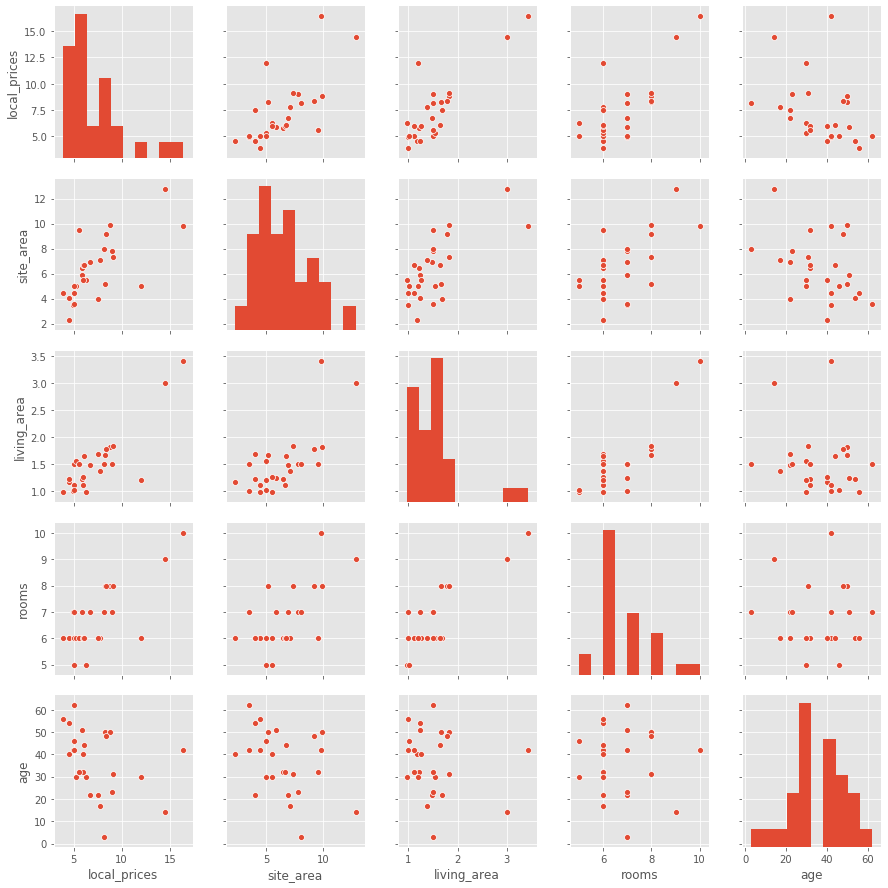

In [155]:
sns.pairplot(smaller)

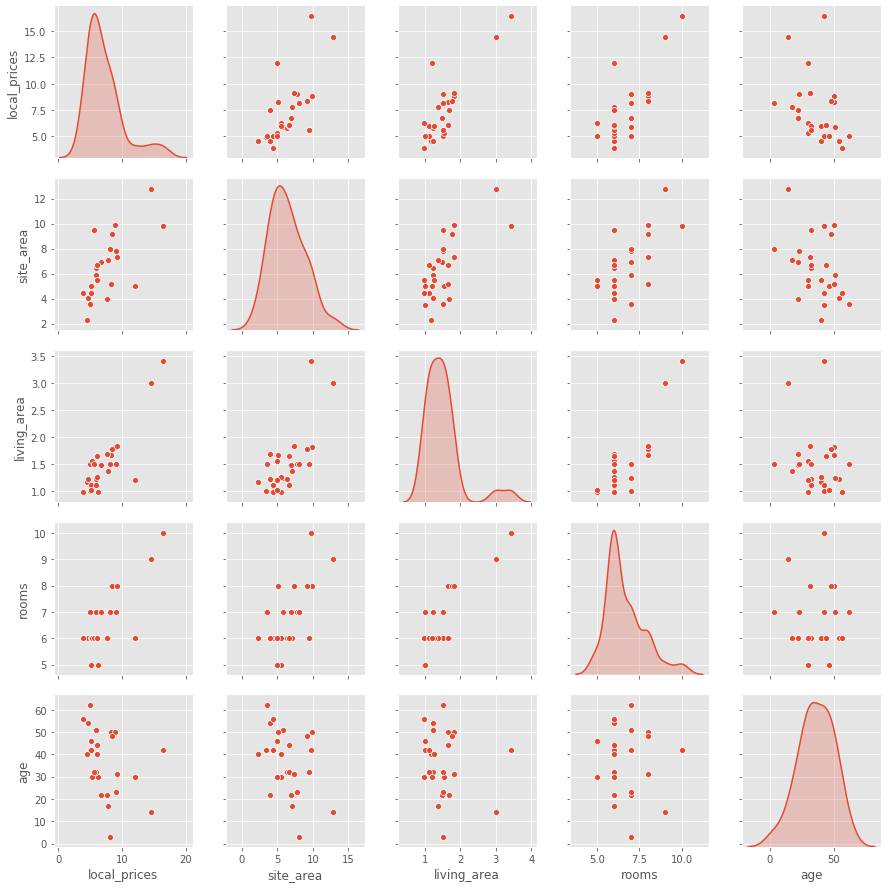

In [157]:
sns.pairplot(smaller, diag_kind='kde')

/home/elsa/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/elsa/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/elsa/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/elsa/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


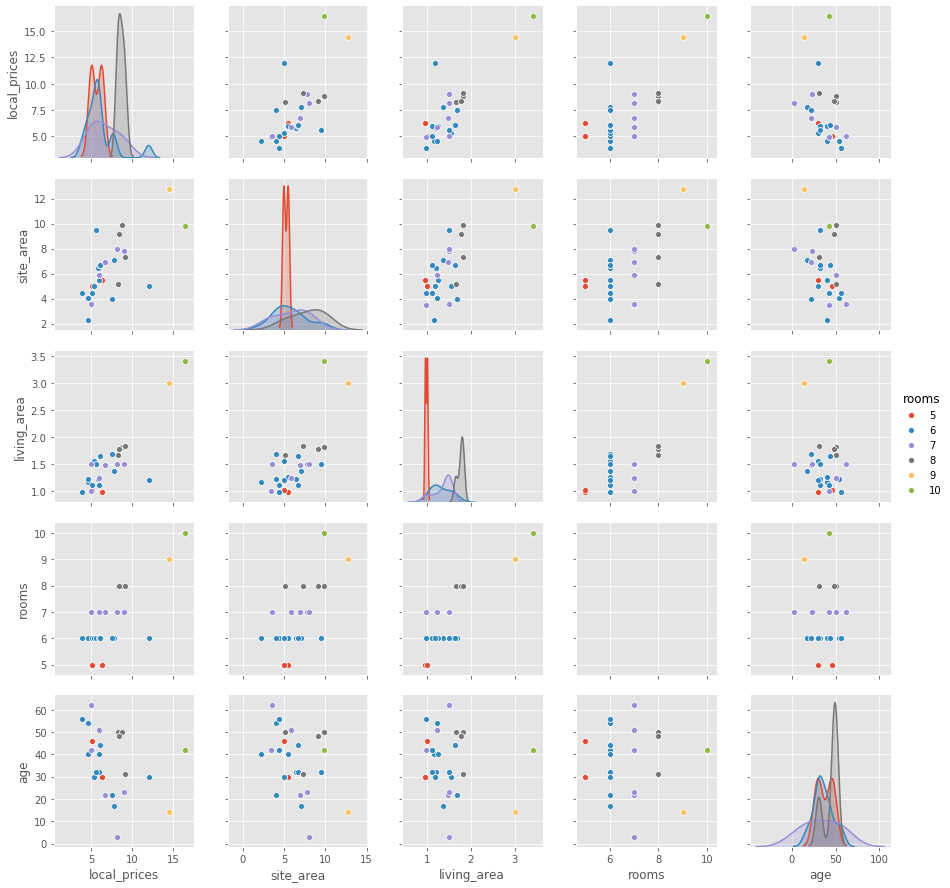

In [158]:
sns.pairplot(data=smaller, diag_kind='kde', hue='rooms')

## Linear relationships

https://seaborn.pydata.org/tutorial/regression.html

### `lmplot()`

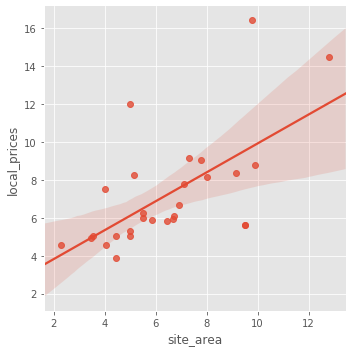

In [159]:
sns.lmplot(data=smaller, x='site_area', y='local_prices')
# es solo para visualizar, no puedes sacar los coeficientes

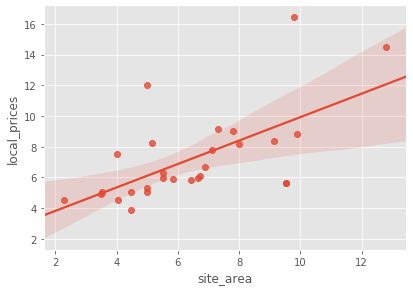

In [160]:
sns.lmplot(data=smaller, x='site_area', y='local_prices')
plt.gcf().set_size_inches(6,4)
# seaborn utiliza matplotlib por debajo

## Categorical data

https://www.kaggle.com/c/titanic/download/train.csv

https://seaborn.pydata.org/tutorial/categorical.html

In [161]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Swarm plot

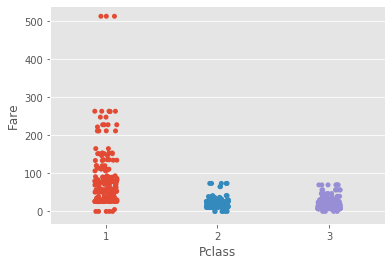

In [163]:
sns.stripplot(data=titanic, x='Pclass', y='Fare')

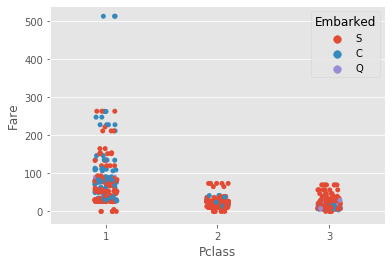

In [164]:
sns.stripplot(data=titanic, x='Pclass', y='Fare', hue='Embarked')

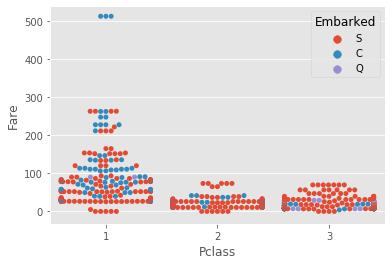

In [165]:
sns.swarmplot(data=titanic, x='Pclass', y='Fare', hue='Embarked')
# así no se solapan los puntos

### Boxplot

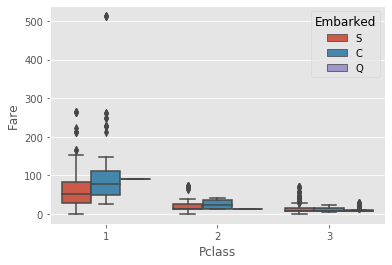

In [166]:
sns.boxplot(data=titanic, x='Pclass', y='Fare', hue='Embarked')

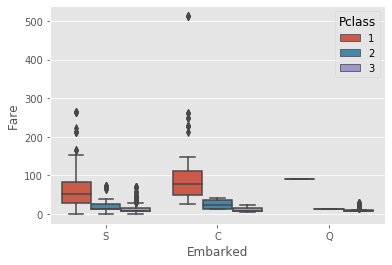

In [167]:
sns.boxplot(data=titanic, x='Embarked', y='Fare', hue='Pclass')

### Barplot / countplot

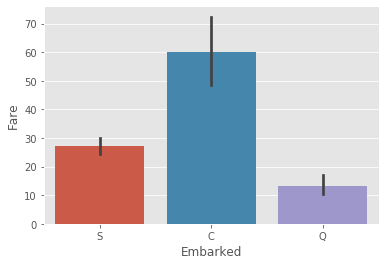

In [168]:
sns.barplot(data=titanic, x='Embarked', y='Fare')

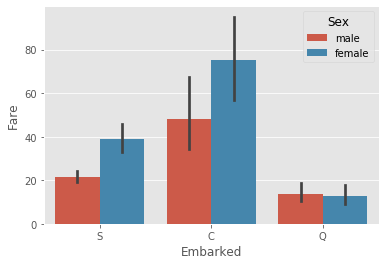

In [170]:
sns.barplot(data=titanic, x='Embarked', y='Fare', hue='Sex')

### Pointplot

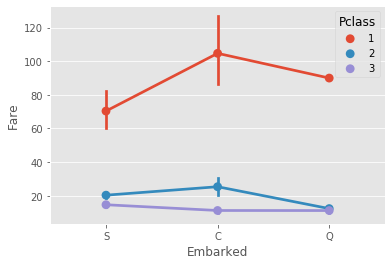

In [172]:
sns.pointplot(data=titanic, x='Embarked', y='Fare', hue='Pclass')
# util para comparar proporciones

## Other types

### Heatmap

In [173]:
df.corr()

,local_prices,bathrooms,site_area,living_area,garages,rooms,bedrooms,age,construction_type,architecture,fireplaces,price
local_prices,1.000000,0.881496,0.628046,0.840312,0.513695,0.750969,0.652932,-0.342791,0.145689,0.057270,0.491864,0.923147
bathrooms,0.881496,1.000000,0.583495,0.894029,0.399777,0.757478,0.726375,-0.200938,0.187706,-0.250035,0.481197,0.925081
site_area,0.628046,0.583495,1.000000,0.680651,0.175567,0.564698,0.459350,-0.382963,-0.108468,0.089554,0.376435,0.666577
living_area,0.840312,0.894029,0.680651,1.000000,0.363548,0.840513,0.791281,-0.177487,0.055476,-0.063674,0.371852,0.921651
garages,0.513695,0.399777,0.175567,0.363548,1.000000,0.566325,0.539703,-0.057658,0.028662,0.096213,0.291581,0.461696
rooms,0.750969,0.757478,0.564698,0.840513,0.566325,1.000000,0.924445,0.011342,0.084212,-0.060402,0.396835,0.777145
bedrooms,0.652932,0.726375,0.459350,0.791281,0.539703,0.924445,1.000000,0.106928,0.126131,-0.248286,0.265366,0.700556
age,-0.342791,-0.200938,-0.382963,-0.177487,-0.057658,0.011342,0.106928,1.000000,0.168621,-0.499828,0.090787,-0.299297
construction_type,0.145689,0.187706,-0.108468,0.055476,0.028662,0.084212,0.126131,0.168621,1.000000,-0.184604,0.110257,0.172716
architecture,0.057270,-0.250035,0.089554,-0.063674,0.096213,-0.060402,-0.248286,-0.499828,-0.184604,1.000000,-0.264363,-0.022302


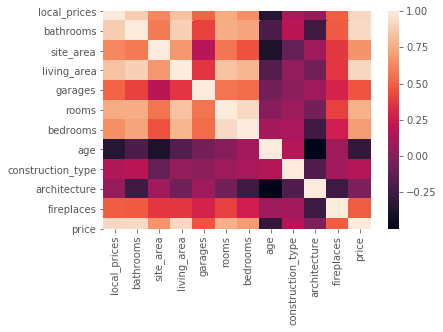

In [174]:
sns.heatmap(df.corr())
# aqui nos interesaria hacer uno divergente, vemos tambien los que se acercan a -1

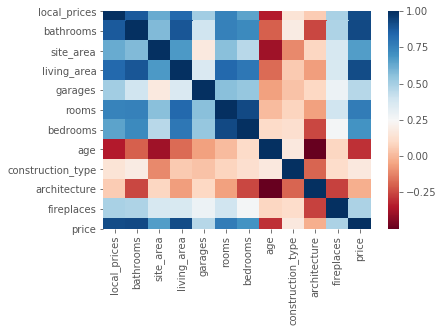

In [176]:
from matplotlib import cm

sns.heatmap(df.corr(), cmap='RdBu')

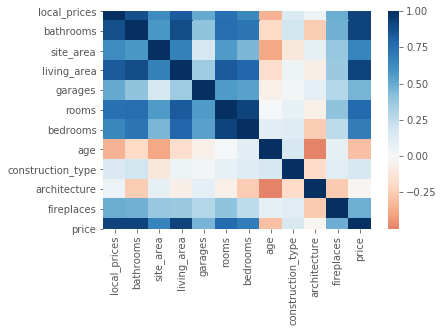

In [177]:
sns.heatmap(df.corr(), cmap='RdBu', center=0)

### Clustermap

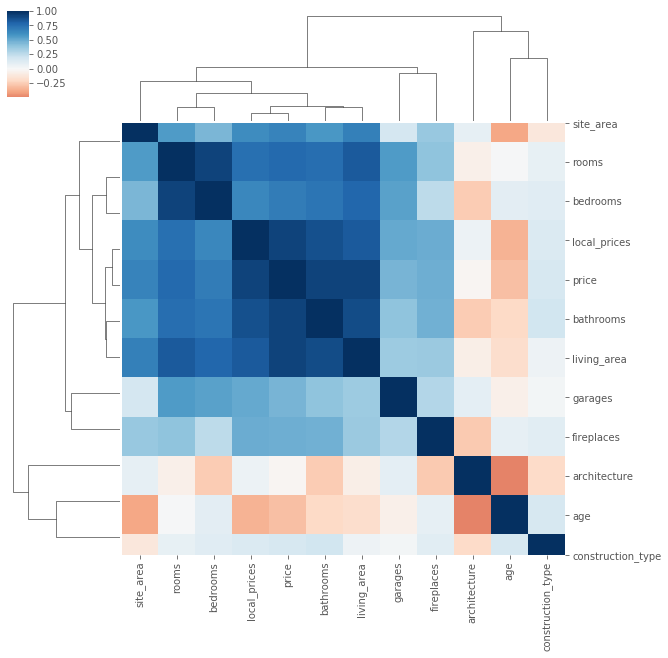

In [178]:
sns.clustermap(df.corr(), cmap='RdBu', center=0)
# aqui el cluster del lado horizontal y del vertical son iguales
# ha agrupado las más cercanas entre sí, las más parecidas

# Bokeh

Bokeh "is a Python interactive visualization library that targets
modern web browsers for presentation". 

Two components: A Python backend and a JS frontend. 

The way we use it is to declare our graphs in Python. 

The Python objects will in turn generate a series of JSON objects that describe a _scenegraph_. The JS component will generate the actual visualization from that scenegraph. The upside of this is that we don't need to work with JS, but our visualizations will be browser-based and interactive

https://bokeh.pydata.org/en/latest/docs/gallery.html

https://bokeh.pydata.org/en/latest/

# Plotly

https://www.analyticsvidhya.com/blog/2017/01/beginners-guide-to-create-beautiful-interactive-data-visualizations-using-plotly-in-r-and-python/

Plotly is a multi-language tool for creating interactive visualizations. It's built on top  of D3.

## Dash

"Shiny for Python" 


# See Also: Vega

http://vega.github.io/

# Additional references

[Matplotlib documentation](http://matplotlib.org/contents.html)

[The matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html)

[Matplotlib cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Nicolas P. Rougier's matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[$\LaTeX$](https://www.latex-project.org/)

# Additional references

[Bokeh User Guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)

[Bokeh Tutorials](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb)

[Dash](https://plot.ly/dash/)

[Dash being spotted before release](https://www.reddit.com/r/Python/comments/6imhxa/plotly_has_just_released_dash_20_a_shinylike_tool/)

[Facets](https://pair-code.github.io/facets/)

[Facets release Google research blog entry](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)